1. Download the hr.csv file (can be found in the attachment)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import ssl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *

# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("HR.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Calculate basic statistics for variables (mean, median, mode, min / max, mean deviation)

In [3]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [5]:
data.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [6]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [8]:
data.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [11]:
data.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

3. Calculate and visualize correlation matrix for variables

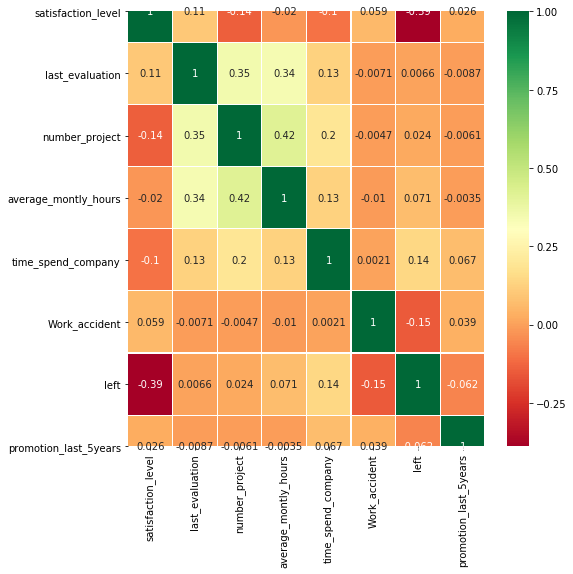

In [22]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
# gcf() - getting the current figure
fig=plt.gcf()
# set_size_inches() - set figure size
fig.set_size_inches(8,8)
plt.show()


From this matrix it is clear that there is an inverse relationship between the level of satisfaction and the change of employer (firing).

4. Visualize multiple relationships between variables

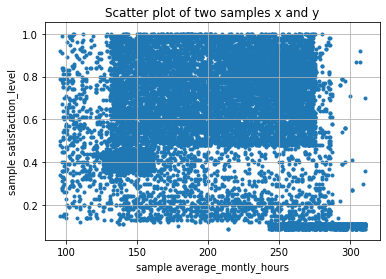

In [4]:
avg = data['average_montly_hours']
satisfaction_level = data['satisfaction_level']
plt.xlabel('sample average_montly_hours')
plt.ylabel('sample satisfaction_level')
plt.title('Scatter plot of two samples x and y')
plt.grid(True)
plt.scatter(avg, satisfaction_level, marker='.')

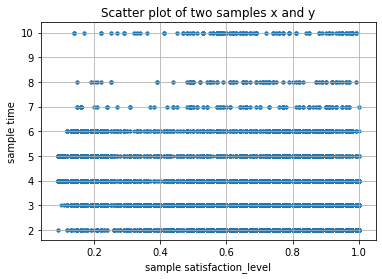

In [5]:
satisfaction_level = data['satisfaction_level']
time = data['time_spend_company']
plt.xlabel('sample satisfaction_level')
plt.ylabel('sample time')
plt.title('Scatter plot of two samples x and y')
plt.grid(True)
plt.scatter(satisfaction_level, time, marker='.')

5. Test relationships between multiple variables using t-test statistics

In [28]:
low = data[data['salary']=='low']['satisfaction_level']
stats.ttest_1samp(low, data['satisfaction_level'].mean())

Ttest_1sampResult(statistic=-4.058538121602221, pvalue=4.9895149767038095e-05)

* T * -value -4.06, we are evaluating the p-value.
Sample count = 7316.

In [29]:
len(low)

7316

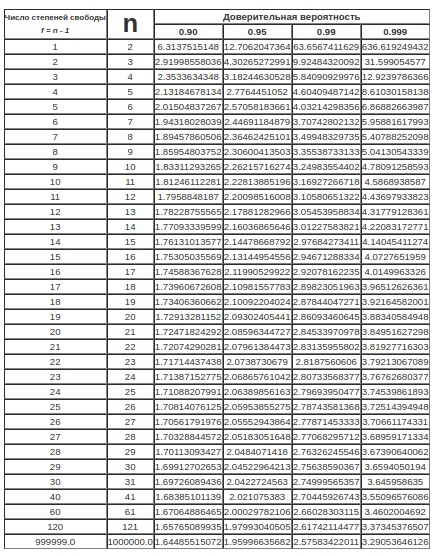

In [30]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

Since the t-value does not exceed 1.97, we accept the null hypothesis (that the sample means are equal).
The p-value is 4.9895149767038095e-05, which is much higher than the standard alpha of 0.05, so we accept the null hypothesis and can say that there is no statistical difference between the satisfaction rate of those receiving low salary and the general population as a whole. The next graph also confirms this hypothesis.

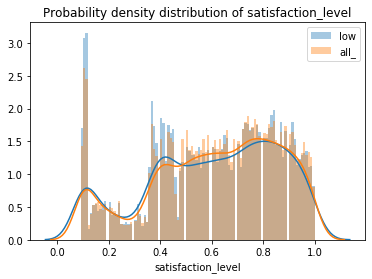

In [6]:
low = data[data['salary']=='low']['satisfaction_level']
all_ = data['satisfaction_level']
sns.distplot(low, 100)
sns.distplot(all_, 100)
plt.title('Probability density distribution of satisfaction_level')
plt.legend(['low', 'all_'])
plt.show()

In [8]:
low = data[data['salary']=='low']['satisfaction_level']
high = data[data['salary']=='high']['satisfaction_level']

print(stats.ttest_ind(low, high))

Ttest_indResult(statistic=-4.76273109535092, pvalue=1.9413281282548522e-06)


The p-value is 1.94, which is much higher than the standard alpha of 0.05, so we accept the null hypothesis and can say that there is no statistical difference between the satisfaction rate of those receiving low- and high salary. That is, the salary does not affect the level of satisfaction.

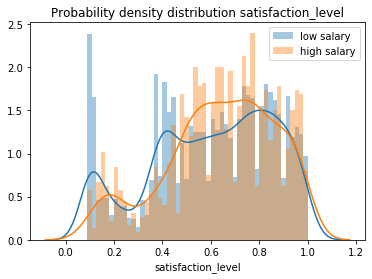

In [9]:
sns.distplot(low, 50)
sns.distplot(high, 50)
plt.title('Probability density distribution satisfaction_level')
plt.legend(['low salary', 'high salary'])
plt.show()

6. Calculate how many employees work in each department

In [45]:
data.groupby('sales').size()

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

7. Show employee distribution by salary

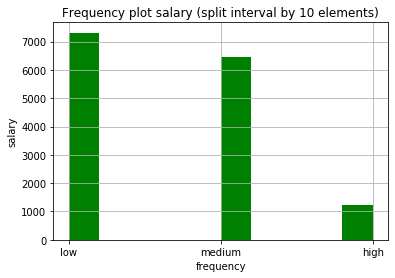

In [10]:
n, bins, patches = plt.hist(data['salary'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('salary')
plt.title('Frequency plot salary (split interval by 10 elements)')
plt.grid(True)
plt.show()

8. Show the distribution of employees by salary in conjunction with departments

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245E908C788>,
      dtype=object)

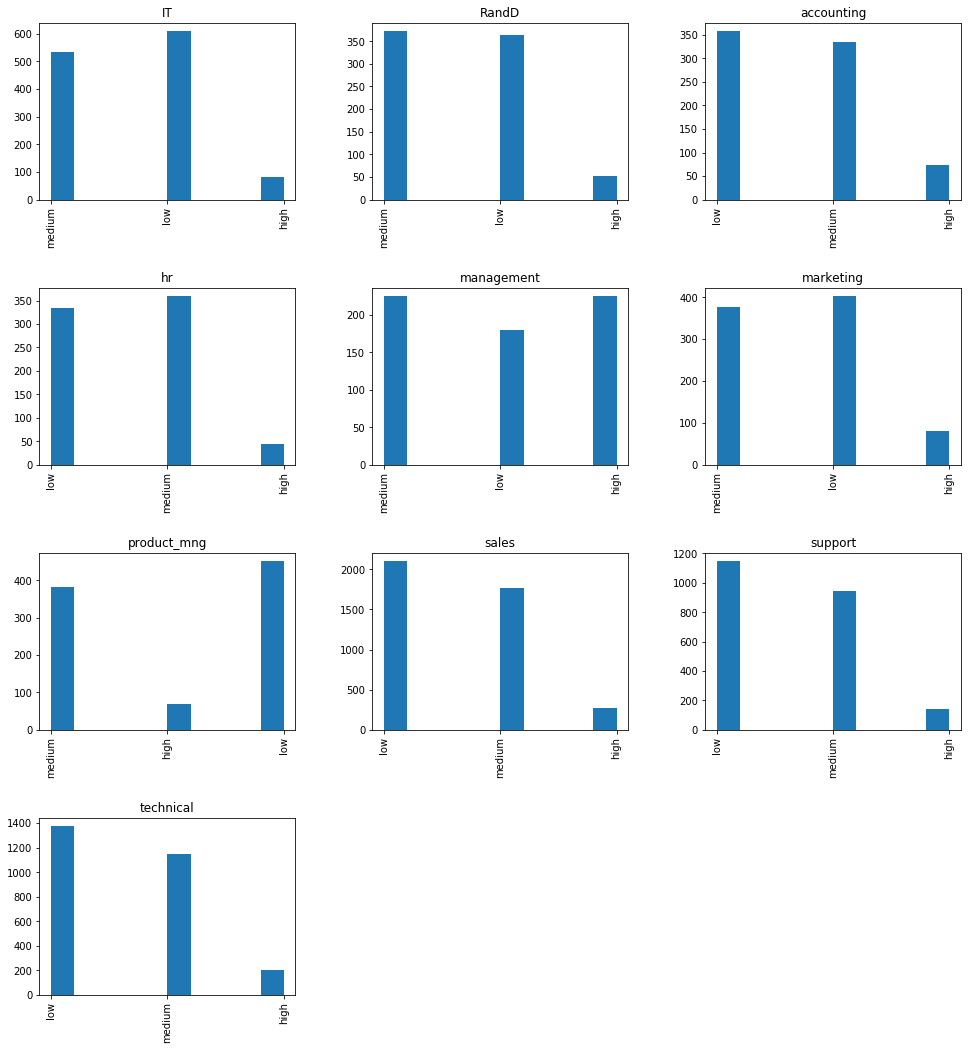

In [49]:
data['salary'].hist(by=data['sales'], figsize = (16,18))

As you might expect, the highest salaries are in managerial positions.

9. How many employees left the company

In [50]:
left = data[data['left']==1]
len(left)

3571

10. Test multiple data hypotheses to understand why employees leave the company

In [51]:
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Here we see that employees who left the company had low satisfaction rates, low promotion rates, and worked harder compared to those who stayed with the company.

In [52]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [53]:
# Renaming certain columns for better readability
data = data.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [54]:
front = data['turnover']
data.drop(labels=['turnover'], axis=1,inplace = True)
data.insert(0, 'turnover', front)
data.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


T-test (measure of satisfaction)
The single-sample T test tests whether the sample mean is different from the population mean. Since satisfaction has the highest correlation with our dependent variable (fluctuation), let's check if the average satisfaction level of employees who left the company differs from those who stayed.

Hypothesis testing: is there a significant difference in the level of satisfaction between employees who left the company from the employees who remained

Null hypothesis: (H0: pTS = pES) The null hypothesis is that there is no difference in the level of satisfaction between employees who quit and those who did not.

Alternative hypothesis: (HA: pTS! = PES) An alternative hypothesis is that there is a difference in the level of satisfaction between employees who stayed and quit.

In [56]:
df = data
emp_population = df['satisfaction'][df['turnover'] == 0].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_turnover_satisfaction) )


The mean satisfaction for the employee population with no turnover is: 0.666809590479516
The mean satisfaction for employees that had a turnover is: 0.44009801176140917


Let's run a t-test with a 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the population of employees. To run one example of a t-test, we can use the stats.ttest_1samp () function:

In [57]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population)  # Employee Who Had No Turnover satisfaction mean

Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

The test result shows the statistic of test "t" equal to -51.33. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the t-distribution quartiles corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check quartiles with stats.t.ppf ():

If the t-statistic we calculated above (-51.33) is outside the quartiles, then we can reject the null hypothesis

In [58]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


Accordingly, there is a statistically significant difference between the level of satisfaction of those who quit and those who stayed.

Let's check the following hypothesis:
     Null hypothesis: (H0: pTS = pES) Null hypothesis is that there is no difference in the desire to stay and quit between employees who have been promoted for the last 5 years and those who have not.

Alternative hypothesis: (HA: pTS! = PES) An alternative hypothesis is that there is a difference in willingness to stay and quit between employees who have been promoted for the last 5 years and those who have not.

In [60]:
emp_population = df['promotion'][df['turnover'] == 0].mean()
promotion = df[df['turnover']==1]['promotion'].mean()

print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(promotion) )


The mean satisfaction for the employee population with no turnover is: 0.026251312565628283
The mean satisfaction for employees that had a turnover is: 0.005320638476617194


In [61]:
stats.ttest_1samp(a=  df[df['turnover']==1]['promotion'],
                  popmean = emp_population)  

Ttest_1sampResult(statistic=-17.190713188997574, pvalue=1.0688704028386881e-63)

In [62]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


The t-statistic value of -17.19 is outside the quantiles, so the null hypothesis can be rejected by stating that there is a difference between the samples.